## Chapter 4 - Practical Data Visualization

### Segment 5 - Visualizing Time Series

In [2]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 5,6

**The simplest time series plot**

In [10]:
df = pd.read_csv('superstore_sales.csv', index_col='Order Date', encoding='cp1252', parse_dates=True)

In [11]:
df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


<AxesSubplot: xlabel='Order Date'>

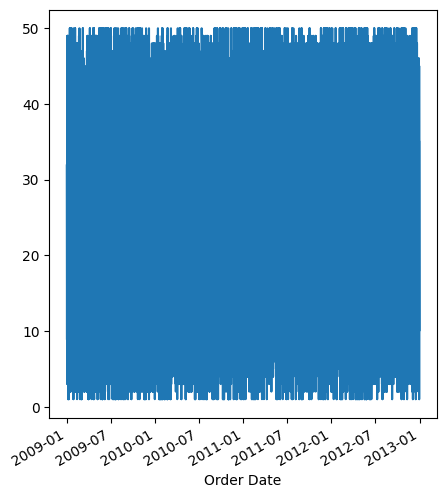

In [12]:
df['Order Quantity'].plot()

<AxesSubplot: title={'center': 'Super Store Sales'}, xlabel='Order Date', ylabel='Order Quantity'>

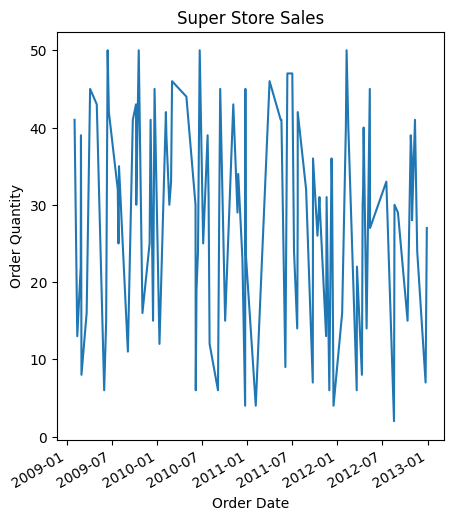

In [15]:
df2 = df.sample(n=100, random_state=25, axis=0)
df2.head()
plt.xlabel('Order Date')
plt.ylabel('Order Quantity')
plt.title('Super Store Sales')
df2['Order Quantity'].plot()

### Segment 6 - Creating Statistical data graphics

In [16]:
import seaborn as sb
sb.set_style('whitegrid')


**Eyeballing dataset distributions with histograms**

<AxesSubplot: ylabel='Frequency'>

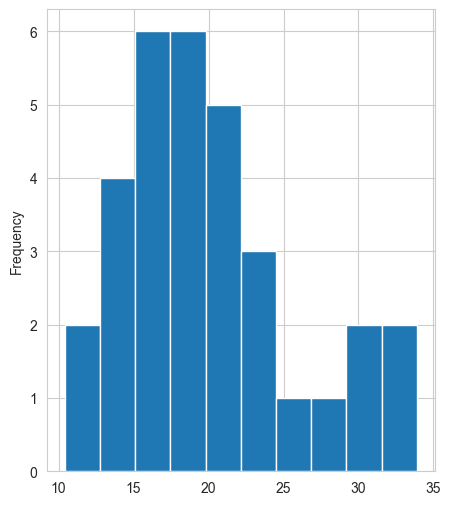

In [23]:
cars = pd.read_csv('mtcars.csv')
cars.rename({'Unnamed: 0': 'Name'}, axis=1, inplace=True)
cars.index = cars.Name
mpg = cars.mpg
mpg.plot(kind='hist')

C:\Users\regulate\AppData\Local\Temp\ipykernel_9760\1522767825.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(cars['mpg'])


<AxesSubplot: xlabel='mpg', ylabel='Density'>

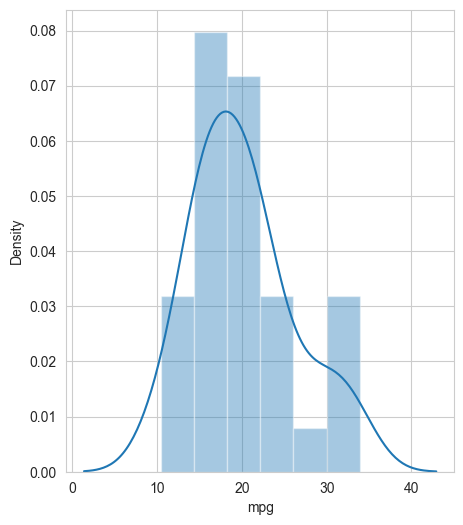

In [50]:
cars
sb.distplot(cars['mpg'])

**Seeing Scatterplots in action**

<AxesSubplot: xlabel='hp', ylabel='mpg'>

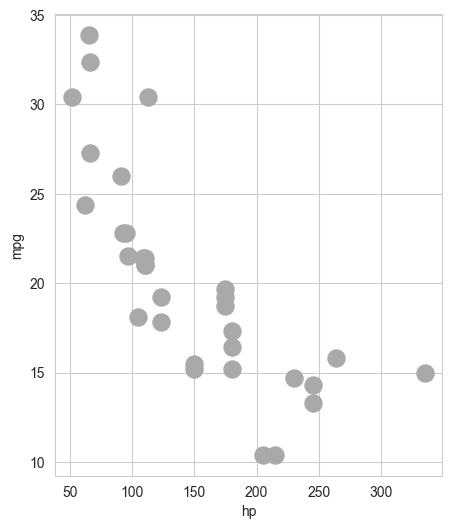

In [52]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['darkgray'], s=150)

<AxesSubplot: xlabel='hp', ylabel='mpg'>

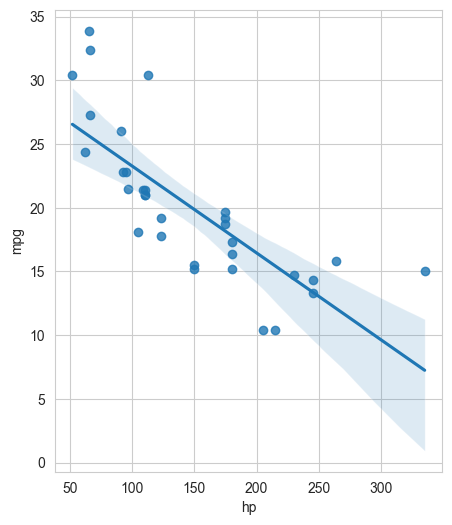

In [54]:
sb.regplot(x='hp', y='mpg', data=cars, scatter=True)


StopIteration: 

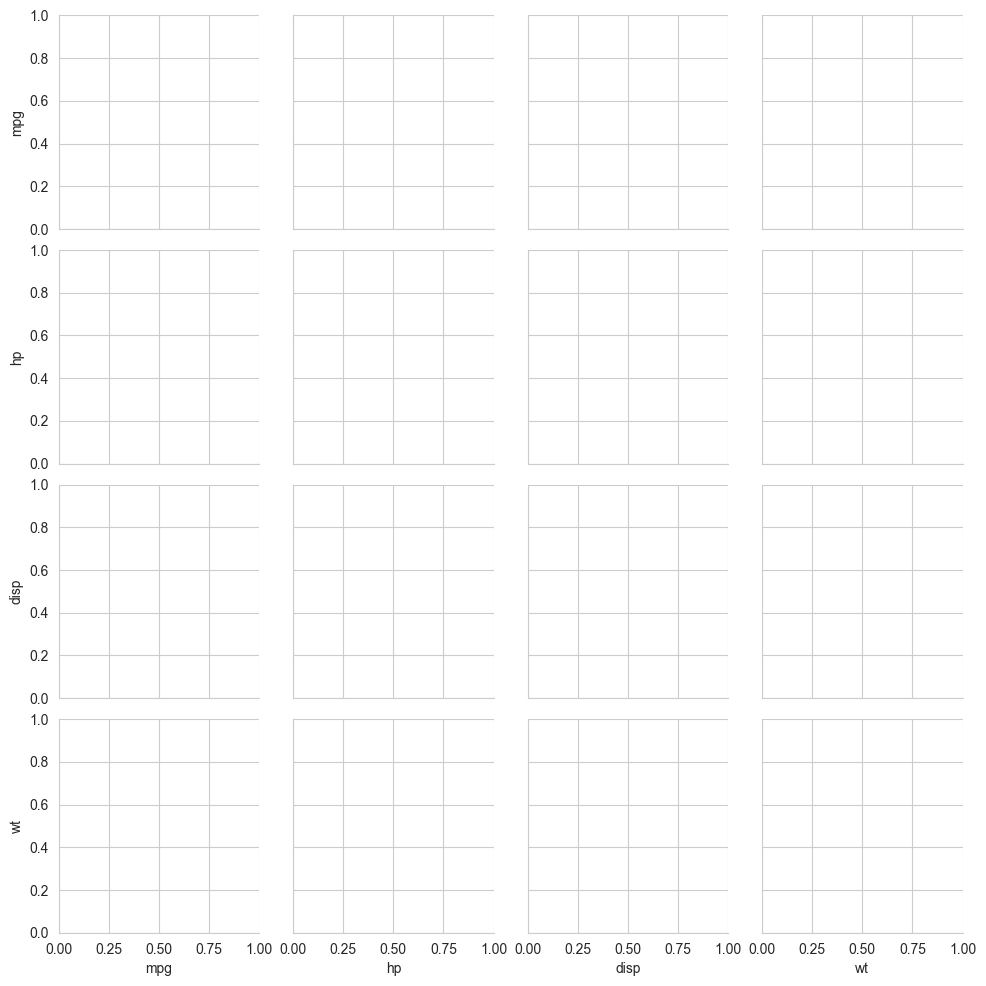

In [61]:
cars_subset = cars[['mpg', 'hp', 'disp', 'wt']]
sb.pairplot(cars_subset)

**Building boxplots**

<AxesSubplot: title={'center': 'wt'}, xlabel='am'>

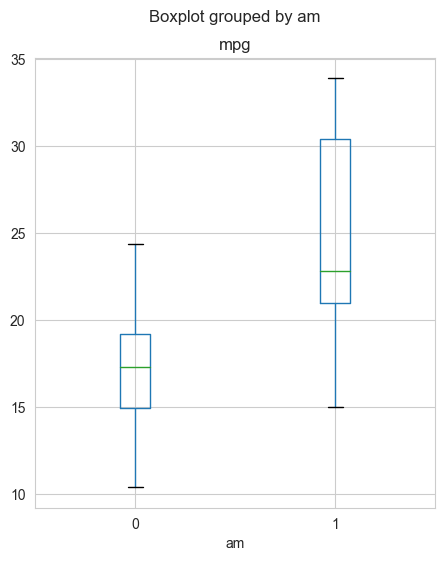

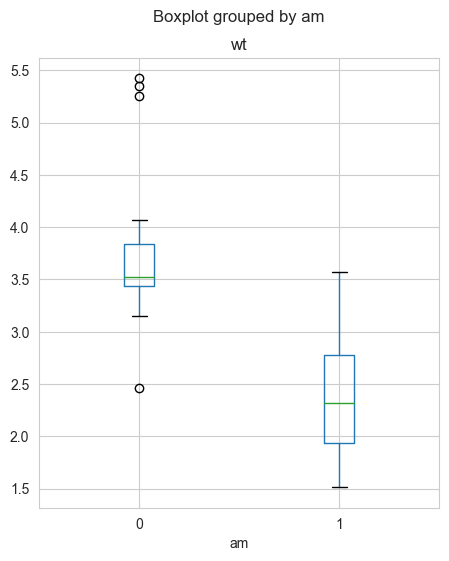

In [64]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

<AxesSubplot: xlabel='am', ylabel='mpg'>

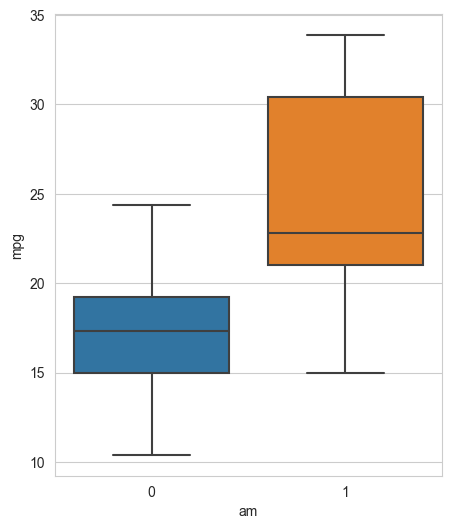

In [65]:
sb.boxplot(data=cars, x='am', y='mpg')

<AxesSubplot: xlabel='am', ylabel='wt'>

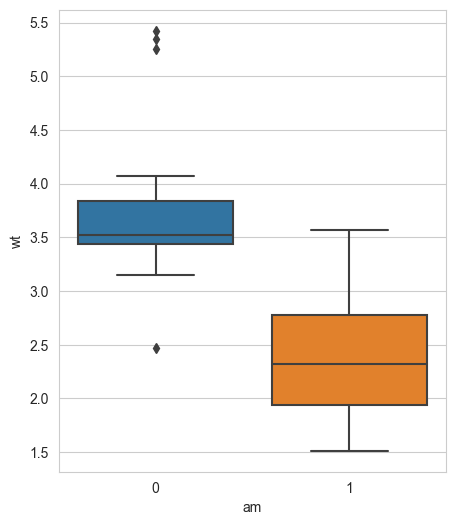

In [68]:
sb.boxplot(data=cars, x='am', y='wt')